# Exploratory data analysis on Zuber rides, by Deborah Thomas

<h2 style="color:red;">Intro:</h2>

## This analysis will 
- look at data, from competitors, and test a hypothesis about the impact of weather on ride frequency.
- identify the top 10 neighborhoods, in terms of drop-offs
- make graphs
- draw conclusions based on each graph and explain the results

<h2 style="color:red;">Import libraries:</h2>

In [205]:
import pandas as pd
import plotly.express as px
import scipy.stats as stats

### Read in Company dataset.

In [207]:
try:
    company = pd.read_csv('/datasets/moved_project_sql_result_01.csv')  # Attempt to read from the server path
except FileNotFoundError:
    company = pd.read_csv('../datasets/moved_project_sql_result_01.csv')  # Fallback to the local path


display(company.head(15))

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


### Company dataset columns:
- company_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017.

In [209]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


#### There is no missing data in the Company dataset.

### Read in Trips dataset.

In [212]:
try:
    trips = pd.read_csv('/datasets/project_sql_result_04.csv')  # Attempt to read from the server path
except FileNotFoundError:
    trips = pd.read_csv('../datasets/moved_project_sql_result_04.csv')  # Fallback to the local path


display(trips.head(15))

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Trips dataset columns
- dropoff_location_name: Chicago neighborhoods where rides ended
- average_trips: the average number of rides that ended in each neighborhood in November 2017.

In [214]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


#### There is no missing data in the Trips dataset.

### Read in Weather dataset.

In [217]:
try:
    weather = pd.read_csv('/datasets/project_sql_result_07.csv', parse_dates=['start_ts'])  # Attempt to read from the server path
except FileNotFoundError:
    weather = pd.read_csv('../datasets/moved_project_sql_result_07.csv')  # Fallback to the local path


display(weather.head(15))

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


####  Weather Dataset columns
- start_ts — pickup date and time
- weather_conditions — weather conditions at the moment the ride started
- duration_seconds: ride duration in seconds


In [219]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


#### There is no missing data in the Weather dataset. The start_ts column was read in as type datetime64.

### There is no missing data, in any of the 3 datasets.

<h2 style="color:red;">Check Datatypes:</h2>

In [223]:
company.dtypes

company_name    object
trips_amount     int64
dtype: object

#### Company datatypes look good.

In [225]:
trips.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

### Change average_trips to int, in Trips dataframe.

In [227]:
trips['average_trips'] = trips['average_trips'].astype('int64')

In [228]:
trips.dtypes

dropoff_location_name    object
average_trips             int64
dtype: object

#### Trips datatypes look good.

In [230]:
weather.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

In [231]:
#Convert 'start_ts' to datetime

In [232]:
#weather['start_ts'] = pd.to_datetime(weather['start_ts'])

### Change duration_seconds to datatype int, in weather dataframe.

In [234]:
weather['duration_seconds'] = weather['duration_seconds'].astype('int64')

In [235]:
weather.weather_conditions.value_counts()

weather_conditions
Good    888
Bad     180
Name: count, dtype: int64

### Convert 'weather_conditions' from object to category, since it is boolean.

In [237]:
weather['weather_conditions'] = weather['weather_conditions'].astype('category')

In [238]:
weather.dtypes

start_ts                object
weather_conditions    category
duration_seconds         int64
dtype: object

#### Weather datatypes look good.

<h2 style="color:red;">Check Dataframes for Duplicates:</h2>

### Company

In [242]:
# Check for duplicates in the company dataframe
duplicates_company = company.duplicated()
print(duplicates_company)

0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62    False
63    False
Length: 64, dtype: bool


In [243]:
# Count the number of duplicate rows in the company dataframe
num_duplicates_company = duplicates_company.sum()
print(f"Number of duplicate rows: {num_duplicates_company}")

Number of duplicate rows: 0


#### The company dataframe has 0 duplicate rows.

### Trips

In [246]:
# Check for duplicates in the trips dataframe
duplicates_trips = trips.duplicated()
print(duplicates_trips)

0     False
1     False
2     False
3     False
4     False
      ...  
89    False
90    False
91    False
92    False
93    False
Length: 94, dtype: bool


In [247]:
# Count the number of duplicate rows in the trips dataframe
num_duplicates_trips = duplicates_company.sum()
print(f"Number of duplicate rows: {num_duplicates_trips}")

Number of duplicate rows: 0


#### The company dataframe has 0 duplicate rows.

In [249]:
# Check for duplicates in the weather dataframe
duplicates_weather = weather.duplicated()
print(duplicates_weather)

0       False
1       False
2       False
3       False
4       False
        ...  
1063    False
1064    False
1065     True
1066     True
1067    False
Length: 1068, dtype: bool


In [250]:
# Count the number of duplicate rows in the weather dataframe
num_duplicates_weather = duplicates_weather.sum()
print(f"Number of duplicate rows: {num_duplicates_weather}")

Number of duplicate rows: 197


#### There are 197 duplicate rows in the weather dataframe.

In [252]:
 # Display the first few duplicate rows (optional)
 duplicate_rows_weather = weather[duplicates_weather]
 print("First few duplicate rows:\n", duplicate_rows_weather.head(20))

First few duplicate rows:
                 start_ts weather_conditions  duration_seconds
62   2017-11-11 06:00:00               Good              1260
74   2017-11-11 08:00:00               Good              1380
76   2017-11-04 09:00:00               Good              1380
117  2017-11-11 07:00:00               Good              1380
119  2017-11-04 14:00:00               Good              3300
125  2017-11-11 08:00:00               Good              1380
126  2017-11-11 09:00:00               Good              1380
130  2017-11-11 10:00:00               Good              1260
179  2017-11-11 06:00:00               Good              1260
190  2017-11-04 08:00:00               Good              1323
196  2017-11-18 10:00:00                Bad              1440
202  2017-11-04 12:00:00               Good              2640
207  2017-11-11 08:00:00               Good              1200
216  2017-11-04 08:00:00               Good              1380
230  2017-11-11 09:00:00               Good

### Delete duplicates from weather.

In [254]:
# Remove 197 rows where all columns are duplicates of another row
weather = weather.drop_duplicates()

In [255]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   start_ts            871 non-null    object  
 1   weather_conditions  871 non-null    category
 2   duration_seconds    871 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 21.4+ KB


In [256]:
1068 - 197

871

In [257]:
# Check for duplicates in the weather dataframe
duplicates_weather = weather.duplicated()
print(duplicates_weather)

0       False
1       False
2       False
3       False
4       False
        ...  
1060    False
1061    False
1063    False
1064    False
1067    False
Length: 871, dtype: bool


In [258]:
# Count the number of duplicate rows in the weather dataframe
num_duplicates_weather = duplicates_weather.sum()
print(f"Number of duplicate rows: {num_duplicates_weather}")

Number of duplicate rows: 0


#### 197 rows removed from the weather dataframe.
#### weather is clean now.

### Data is clean now.

<h2 style="color:red;">Analyze data:</h2>

## Identify the top 10 neighborhoods in terms of drop-offs:

In [263]:
# Sort the dataFrame by 'average_trips' column in descending order
trips_sorted = trips.sort_values(by='average_trips', ascending=False)

# Select the top 10 neighborhoods
top_10_neighborhoods = trips_sorted.head(10)

# Print the top 10 neighborhoods
print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop          10727
1           River North           9523
2         Streeterville           6664
3             West Loop           5163
4                O'Hare           2546
5             Lake View           2420
6            Grant Park           2068
7         Museum Campus           1510
8            Gold Coast           1364
9    Sheffield & DePaul           1259


#### Loop is the most popular neighborhood for a drop off spot. River North is runner up. 

<h2 style="color:red;">Graph the Data:</h2>

## Top 10 Neighborhoods by Number of Dropoffs

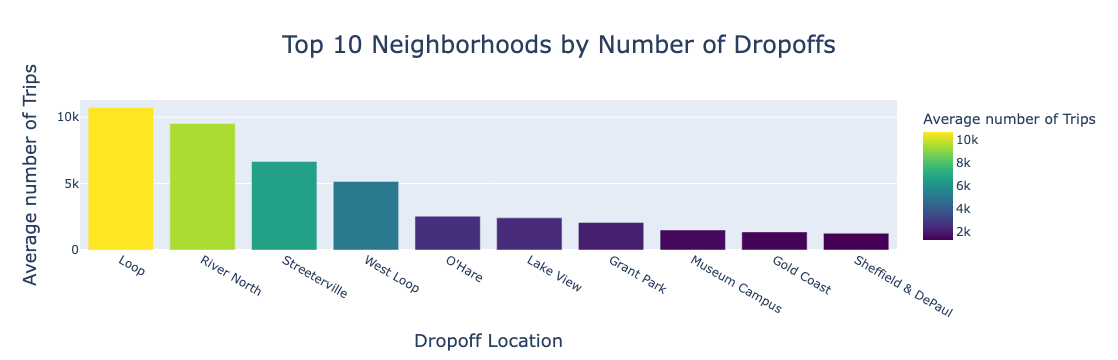

In [267]:
# Create a bar chart using Plotly Express
fig = px.bar(
    top_10_neighborhoods, 
    x='dropoff_location_name', 
    y='average_trips', 
    title='Top 10 Neighborhoods by Number of Dropoffs', 
    labels={'dropoff_location_name': 'Dropoff Location', 'average_trips': 'Average number of Trips'},
    color='average_trips', 
    color_continuous_scale='viridis'
)

# Update the layout to customize titles and their fonts
fig.update_layout(
    title={
        'text': 'Top 10 Neighborhoods by Number of Dropoffs',
        'y':0.9,  # Adjusts the title vertical alignment; 0.9 is near the top
        'x':0.5,  # Centers the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}  # Title font size
    },
    xaxis={
        'title': {
            'text': 'Dropoff Location',
            'font': {'size': 18}  # X-axis title font size
        }
    },
    yaxis={
        'title': {
            'text': 'Average number of Trips',
            'font': {'size': 18}  # Y-axis title font size
        }
    }
)

# Show the plot
fig.show()

### The Loop neighborhood has the most amount of dropoffs, at 10,727. This is more than double the amount of dropoffs for the neighborhoods ranked 4-10.
- In 2nd place, for most amount of dropoffs, is the River North neighborhood, with 9,523 dropoffs.

## Taxi Companies by Number of Rides

In [270]:
# Sort the dataFrame by 'average_trips' column in descending order
company_trips_sorted = company.sort_values(by='trips_amount', ascending=False)

# Select the top 10 neighborhoods
company_taxi_rides_total = company_trips_sorted.head(10)

# Print the top 10 neighborhoods
print(company_taxi_rides_total)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


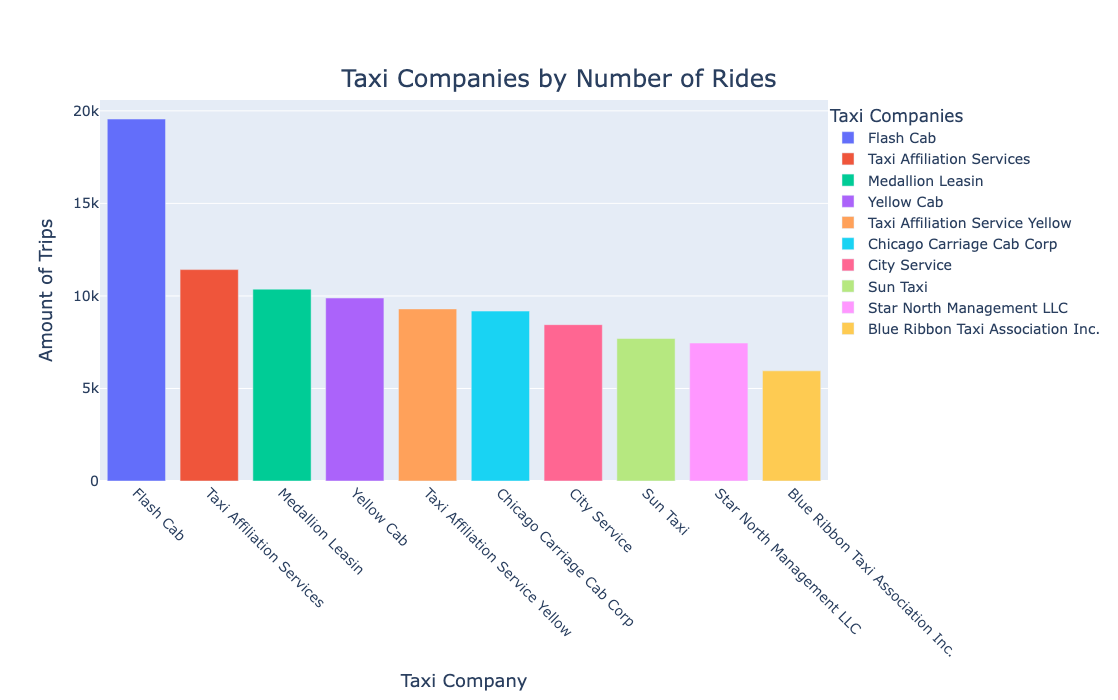

In [271]:
fig = px.bar(
    company_taxi_rides_total, 
    x='company_name', 
    y='trips_amount', 
    color='company_name', 
    title='Taxi Companies by Number of Rides',
    labels={'company_name': 'Taxi Company', 'trips_amount': 'Amount of Trips'}
)

# Customize layout
fig.update_layout(
    title={
        'text': 'Taxi Companies by Number of Rides',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    xaxis=dict(
        title='Taxi Company',
        tickangle=45,  # Rotate x-axis labels to 45 degrees
        title_font={'size': 18}
    ),
    yaxis=dict(
        title='Amount of Trips',
        title_font={'size': 18}
    ),
    font=dict(size=14),
    width=1140,  # Increase the width of the entire figure
    height=700,  # Keep the height of the entire figure
    margin=dict(
        l=100,  # Adjust margins as needed
        r=50,   # Adjust the right margin as needed
        b=100,  # Increase the bottom margin to accommodate rotated labels
        t=100   # Top margin
    ),
    legend_title_text='Taxi Companies',
    legend=dict(
        x=1,  # Position the legend on the right
        y=1,  # Position the legend at the top
        traceorder='normal',
        font=dict(size=14)
    )
)

# Show the plot
fig.show()

### Flash Cab is the most popular Taxi company, with 19,558 rides. It has double the rides of almost all of the other Taxi companies.
- In 2nd place, is Taxi Affiliation Services, with 11,422 rides.

<h2 style="color:red;">Merge dataframes:</h2>

### Add dummy column

In [275]:
# Create a dummy column in weather and trips DataFrame to join them on
weather['join_key'] = 1
trips['join_key'] = 1

In [276]:
# Perform merge on join_key
merged_df_weather_trips = pd.merge(weather, trips, on='join_key').drop('join_key', axis=1)

In [277]:
print('\n')
print("weather dataframe merged with trips dataframe:")
print('\n')
display(merged_df_weather_trips.head(5))



weather dataframe merged with trips dataframe:




,start_ts,weather_conditions,duration_seconds,dropoff_location_name,average_trips
0,2017-11-25 16:00:00,Good,2410,Loop,10727
1,2017-11-25 16:00:00,Good,2410,River North,9523
2,2017-11-25 16:00:00,Good,2410,Streeterville,6664
3,2017-11-25 16:00:00,Good,2410,West Loop,5163
4,2017-11-25 16:00:00,Good,2410,O'Hare,2546


### Get the average duration of rides on rainy Saturdays. "Rainy" is marked as "Bad" in the weather_conditions column, of the weather dataframe.

### In pandas, the dt.dayofweek property returns the day of the week as an integer, where the days are numbered from 0 to 6, starting with Monday.

- Monday: 0
- Tuesday: 1
- Wednesday: 2
- Thursday: 3
- Friday: 4
- Saturday: 5
- Sunday: 6

### Rainy Saturdays, with dropoff at O'Hare

In [281]:
# Ensure 'start_ts' is in datetime format
merged_df_weather_trips['start_ts'] = pd.to_datetime(merged_df_weather_trips['start_ts'])

In [282]:
rainy_saturdays = merged_df_weather_trips[
    (merged_df_weather_trips['weather_conditions'] == 'Bad') & 
    (merged_df_weather_trips['start_ts'].dt.dayofweek == 5) & 
    (merged_df_weather_trips['dropoff_location_name'] == "O'Hare")
]

In [283]:
display(rainy_saturdays.head(5))

,start_ts,weather_conditions,duration_seconds,dropoff_location_name,average_trips
568,2017-11-04 16:00:00,Bad,2969,O'Hare,2546
2824,2017-11-18 12:00:00,Bad,1980,O'Hare,2546
3200,2017-11-04 17:00:00,Bad,2460,O'Hare,2546
4798,2017-11-04 16:00:00,Bad,2760,O'Hare,2546
4892,2017-11-18 12:00:00,Bad,2460,O'Hare,2546


### Sunny Saturdays, with dropoff at O'Hare

In [285]:
sunny_saturdays = merged_df_weather_trips[
    (merged_df_weather_trips['weather_conditions'] == 'Good') & 
    (merged_df_weather_trips['start_ts'].dt.dayofweek == 5) & 
    (merged_df_weather_trips['dropoff_location_name'] == "O'Hare")
]

In [286]:
display(sunny_saturdays.head(5))

,start_ts,weather_conditions,duration_seconds,dropoff_location_name,average_trips
4,2017-11-25 16:00:00,Good,2410,O'Hare,2546
98,2017-11-25 14:00:00,Good,1920,O'Hare,2546
192,2017-11-25 12:00:00,Good,1543,O'Hare,2546
286,2017-11-04 10:00:00,Good,2512,O'Hare,2546
380,2017-11-11 07:00:00,Good,1440,O'Hare,2546


### Calculate the average duration of rides on rainy / sunny Saturdays.

In [288]:
# Calculate the average duration_seconds for rainy and sunny Saturdays
rainy_saturdays_avg_duration = rainy_saturdays['duration_seconds'].mean()
print('\n')
print("Rainy Saturdays avg duration:")
print(round(rainy_saturdays_avg_duration, 2))



Rainy Saturdays avg duration:
2409.23


In [289]:
rainy_sat_minutes = rainy_saturdays_avg_duration / 60
print("Average number of minutes, for rides on rainy Saturdays:")
print(rainy_sat_minutes)

Average number of minutes, for rides on rainy Saturdays:
40.15382882882883


In [290]:
sunny_saturdays_avg_duration = sunny_saturdays['duration_seconds'].mean()
print('\n')
print("Sunny Saturdays avg duration:")
print(round(sunny_saturdays_avg_duration, 2))



Sunny Saturdays avg duration:
2032.25


In [291]:
sunny_sat_minutes = sunny_saturdays_avg_duration / 60
print("Average number of minutes, for rides on sunny Saturdays:")
print(sunny_sat_minutes)

Average number of minutes, for rides on sunny Saturdays:
33.87088520055325


<h2 style="color:red;">Testing Hypotheses:</h2>

<h2 style="color:hotpink;">Null Hypothesis:</h2>
- The average duration of rides, from the Loop, to O'Hare International Airport, does NOT change on rainy Saturdays.

<h2 style="color:hotpink;">Alternative Hypothesis:</h2>
- The average duration of rides, from the Loop, to O'Hare International Airport, DOES change on rainy Saturdays.

In [295]:
# Perform T-test
t_stat, pvalue = stats.ttest_ind(rainy_saturdays['duration_seconds'], sunny_saturdays['duration_seconds'], equal_var=False)

print('\n')
print(f"P-value: {pvalue}")
print('\n')

alpha = 0.05

if pvalue < alpha:
    
    print("\033[1mReject the null hypothesis: There is a significant difference in ride durations on rainy Saturdays.\033[0m")
else:
    print("\033[1mFail to reject the null hypothesis: There is no significant difference in ride durations on rainy Saturdays.\033[0m")



P-value: 9.126383933880086e-08


Reject the null hypothesis: There is a significant difference in ride durations on rainy Saturdays.


## Description of hypothesis testing:

### alpha = 0.05
- This is the threshold for significance.

### pvalue = 0.000000091 , which is far less than the alpha (0.05)
-  If the P-value is less than alpha ( 0.05 ), we reject the null hypothesis.

<h2 style="color:red;">Conclusion:</h2>

### The top 10 neighborhoods, in terms of drop-offs:
- Loop neighborhood has the most amount of drop-offs, at 10,727.
- River North neighborhood came in 2nd, with 9,523 drop-offs.
- Loop had double the amount of drop-offs compared to most of the top 10.
### Taxi companies by number of rides:
- Flash Cab company had the most amount of rides than any other company, with 19,558 rides.
- Flash Cab company had more than double the rides of most of the top 10 cab companies.
### Ride Duration on rainy / non-rainy Saturdays:
- There is a significant difference in ride durations on rainy Saturdays, as compared to non-rainy Saturdays.
- The average duration of rides ( in seconds ), on a rainy Saturday is : 2427 ( 40 minutes ).
- The average duration of rides ( in seconds ), on a non-rainy Saturday is : 2000 ( 33 minutes ).